In [1]:
import pandas as pd
import numpy as np
mvc = pd.read_csv('nypd_mvc_2018.csv')
print(mvc.head())
print()
print(mvc.info())
print()
print(mvc.shape)

   unique_key        date   time    borough                location  \
0     3869058  2018-03-23  21:40  MANHATTAN  (40.742832, -74.00771)   
1     3847947  2018-02-13  14:45   BROOKLYN  (40.623714, -73.99314)   
2     3914294  2018-06-04   0:00        NaN   (40.591755, -73.9083)   
3     3915069  2018-06-05   6:36     QUEENS   (40.73602, -73.87954)   
4     3923123  2018-06-16  15:45      BRONX  (40.884727, -73.89945)   

                          on_street    cross_street  \
0  WEST 15 STREET                         10 AVENUE   
1  16 AVENUE                              62 STREET   
2  BELT PARKWAY                                 NaN   
3  GRAND AVENUE                      VANLOON STREET   
4                               NaN             NaN   

                                 off_street  pedestrians_injured  \
0                                       NaN                    0   
1                                       NaN                    0   
2                                     

The dataset has 57,864 rows and 26 columns. Some of the columns which are important for our analysis has a high numbers of null values.
So it is very difficult to drop the columns,tjherefore they will be filled


In [2]:
print(mvc.columns)

Index(['unique_key', 'date', 'time', 'borough', 'location', 'on_street',
       'cross_street', 'off_street', 'pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed', 'vehicle_1',
       'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1',
       'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4',
       'cause_vehicle_5'],
      dtype='object')


These are the columns name

In [3]:
null_count = mvc.isnull().sum()
print(null_count)

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64


To give us a better picture of the null values in the data, let's calculate the percentage of null values in each column

In [4]:
null_pct = null_count / mvc.shape[0] * 100
print(null_pct)

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64


Putting the null count and null percentage in a dataframe for better understanding


In [5]:
null_df = pd.DataFrame({'null_count' : null_count, 'null_pct' : null_pct})
print(null_df)

                     null_count   null_pct
unique_key                    0   0.000000
date                          0   0.000000
time                          0   0.000000
borough                   20646  35.680216
location                   3885   6.714019
on_street                 13961  24.127264
cross_street              29249  50.547836
off_street                44093  76.201092
pedestrians_injured           0   0.000000
cyclist_injured               0   0.000000
motorist_injured              0   0.000000
total_injured                 1   0.001728
pedestrians_killed            0   0.000000
cyclist_killed                0   0.000000
motorist_killed               0   0.000000
total_killed                  5   0.008641
vehicle_1                   355   0.613508
vehicle_2                 12262  21.191069
vehicle_3                 54352  93.930596
vehicle_4                 57158  98.779898
vehicle_5                 57681  99.683741
cause_vehicle_1             175   0.302433
cause_vehic

In [6]:
print(null_df.T.astype(int))

            unique_key  date  time  borough  location  on_street  \
null_count           0     0     0    20646      3885      13961   
null_pct             0     0     0       35         6         24   

            cross_street  off_street  pedestrians_injured  cyclist_injured  \
null_count         29249       44093                    0                0   
null_pct              50          76                    0                0   

            ...  vehicle_1  vehicle_2  vehicle_3  vehicle_4  vehicle_5  \
null_count  ...        355      12262      54352      57158      57681   
null_pct    ...          0         21         93         98         99   

            cause_vehicle_1  cause_vehicle_2  cause_vehicle_3  \
null_count              175             8692            54134   
null_pct                  0               15               93   

            cause_vehicle_4  cause_vehicle_5  
null_count            57111            57671  
null_pct                 98               99  


About a third of the columns have no null values, with the rest ranging from less than 1% to 99%
Some of the columns has up to 99 percent null values. More investigation is needed on these columns

Investigating the killed columns

In [7]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols]
killed = killed.copy()


To find out the row where the sum of the other killed columns is not equal to the total killed colum

In [8]:
manual_killed_sum = killed.iloc[:,:3].sum(axis=1)
print(manual_killed_sum)

0        0
1        0
2        0
3        0
4        0
        ..
57859    0
57860    0
57861    0
57862    0
57863    0
Length: 57864, dtype: int64


In [9]:
killed_mask = manual_killed_sum != killed['total_killed']
killed_not_eq = killed[killed_mask]
print(killed_not_eq)

       pedestrians_killed  cyclist_killed  motorist_killed  total_killed
3508                    0               0                0           NaN
20163                   0               0                0           NaN
22046                   0               0                1           0.0
48719                   0               0                0           NaN
55148                   0               0                0           NaN
55699                   0               0                0           NaN


We can categorize these into two categories:

- Five rows where the total_killed is not equal to the sum of the other columns because the total value is missing.
- One row where the total_killed is less than the sum of the other columns.

From this, we can conclude that filling null values with the sum of the columns is a fairly good choice for our imputation, given that only six rows out of around 58,000 don't match this pattern.

In [10]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(),manual_killed_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != manual_killed_sum,np.nan)
print(killed[killed_mask])


       pedestrians_killed  cyclist_killed  motorist_killed  total_killed
3508                    0               0                0           0.0
20163                   0               0                0           0.0
22046                   0               0                1           NaN
48719                   0               0                0           0.0
55148                   0               0                0           0.0
55699                   0               0                0           0.0


#### For injured  columns

In [11]:
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured_mask = injured_manual_sum != injured['total_injured']
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(),injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)
print(injured[injured_mask])

       pedestrians_injured  cyclist_injured  motorist_injured  total_injured
1222                     0                0                 1            NaN
3263                     0                0                 3            NaN
3362                     0                0                 0            NaN
3508                     0                0                 0            NaN
10989                    0                0                 0            NaN
12885                    1                0                 0            NaN
13344                    0                0                 0            NaN
15213                    0                0                 0            NaN
20163                    0                0                 0            NaN
20978                    0                0                 0            NaN
23276                    0                0                 1            NaN
24907                    1                0                 0            NaN

In [12]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']
print(mvc['total_killed'].value_counts(dropna=False))
print()
print(mvc['total_injured'].value_counts(dropna=False))
      

0.0    57814
1.0       49
NaN        1
Name: total_killed, dtype: int64

0.0     46615
1.0      8590
2.0      1737
3.0       550
4.0       223
5.0        77
6.0        27
NaN        21
7.0        16
9.0         2
15.0        1
10.0        1
13.0        1
14.0        1
22.0        1
8.0         1
Name: total_injured, dtype: int64


The total killed and total injured columns has been cleaned. The incorrect item identify and corrected.



##### Analyzing the vehicle column

In [13]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicles = mvc[v_cols]
vehicles_1d = vehicles.stack()
vehicles_1d = vehicles_1d.mask(vehicles_1d == 'SPORT UTILITY / STATION WAGON','Station Wagon/Sport Utility Vehicle')
top10_vehicles = vehicles_1d.value_counts().head(10)

print(top10_vehicles)

Station Wagon/Sport Utility Vehicle    38480
Sedan                                  33133
PASSENGER VEHICLE                      16026
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
PICK-UP TRUCK                           1144
dtype: int64


plotting the top ten vehicles

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Top 10 vehicle count plot')

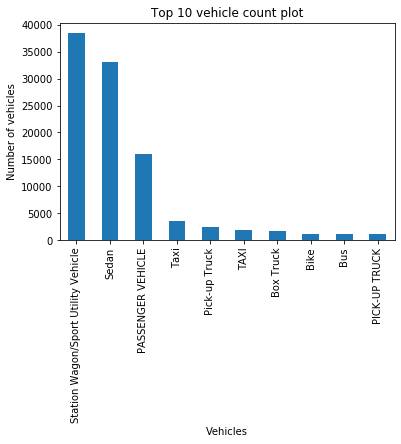

In [15]:
barplot = top10_vehicles.plot(kind = 'bar')
barplot.set_ylabel('Number of vehicles')
barplot.set_xlabel('Vehicles')
barplot.set_title('Top 10 vehicle count plot')

In [16]:
v_missing_mask = mvc['vehicle_1'].isnull() & mvc['cause_vehicle_1'].notnull()
c_missing_mask = mvc['cause_vehicle_1'].isnull() & mvc['vehicle_1'].notnull()

# replace the values matching the mask for each column
# replace the values matching the mask for each column
mvc['vehicle_1'] =  mvc['vehicle_1'].mask(v_missing_mask, "Unspecified")
mvc['cause_vehicle_1'] =  mvc['cause_vehicle_1'].mask(c_missing_mask, "Unspecified")

In [20]:
print(mvc['vehicle_1'].value_counts()['Unspecified'])
print(mvc['cause_vehicle_1'].value_counts()['Unspecified'])

204
12657
